Simple PCA for Image Compression

Load/Generate Image:

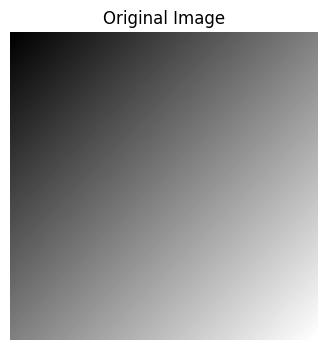

In [13]:
import numpy as np
import matplotlib.pyplot as plt

height, width = 100, 100

img = np.zeros((height, width), dtype=float)
for i in range(height):
    for j in range(width):
        img[i, j] = (i + j) % 256    # simple gradient/pattern

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()



PCA:

-> Flatten the image matrix into a 1D vector.

-> Calculate the covariance matrix of the flattened data.

-> Find the eigenvalues and eigenvectors of the covariance matrix.

In [14]:
X = img.copy()
# Center the data (subtract the row‑mean for each row vector)
X_centered = X - X.mean(axis=1, keepdims=True)

# Covariance matrix
cov = np.cov(X_centered, rowvar=False)  # shape: (width, width)

# Find eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov)


Select components:

Sort the eigenvalues in descending order and choose to keep a small number of the top ones (e.g., 10 or 

20).

In [15]:
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

k = 20   # number of principal components to keep
components = eigvecs_sorted[:, :k]   # shape: (width, k)

Reconstruct Image:

In [16]:
# Project the centered data onto the k components
proj = X_centered @ components    # shape: (height, k)
# Reconstruct back to original width space
X_recon_centered = proj @ components.T  # shape: (height, width)
# Add the row means back
X_recon = X_recon_centered + X.mean(axis=1, keepdims=True)

Compare original and reconstructed images

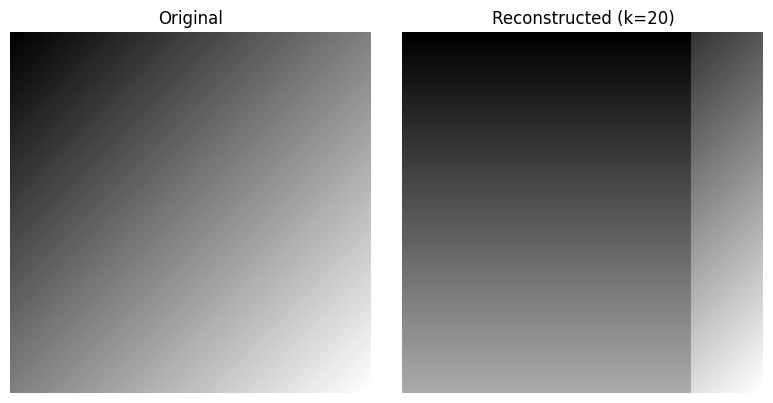

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(X_recon, cmap='gray')
plt.title(f"Reconstructed (k={k})")
plt.axis('off')

plt.tight_layout()
plt.show()